# PART-1

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Task-1
import pandas as pd

url = 'https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv'
df = pd.read_csv(url)

print("First few rows of the dataset:")
print(df.head())

print("\nMissing values in the dataset:")
print(df.isnull().sum())
print("No missing values in the dataset. Therefore, there is no need for handling missing values")

df['Date'] = pd.to_datetime(df['Date'])
print("\nData types after conversion:")
print(df.dtypes)

print("\nFirst few rows after preprocessing:")
print(df.head())

First few rows of the dataset:
         Date      Country  Confirmed  Recovered  Deaths
0  2020-01-22  Afghanistan          0          0       0
1  2020-01-23  Afghanistan          0          0       0
2  2020-01-24  Afghanistan          0          0       0
3  2020-01-25  Afghanistan          0          0       0
4  2020-01-26  Afghanistan          0          0       0

Missing values in the dataset:
Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64
No missing values in the dataset. Therefore, there is no need for handling missing values

Data types after conversion:
Date         datetime64[ns]
Country              object
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object

First few rows after preprocessing:
        Date      Country  Confirmed  Recovered  Deaths
0 2020-01-22  Afghanistan          0          0       0
1 2020-01-23  Afghanistan          0          0       0
2 2020-01-24  Afghanistan   

In [3]:
# Task-2
import numpy as np 

print("Number of rows and columns:", df.shape, "\n")
print("Data types:\n", df.dtypes, "\n")
print("First few rows:\n", df.head(), "\n")
print("Basic information:")
print(df.info())
print("----------------------------------------------------------------------------------------------------------------")

Q1 = df[['Confirmed', 'Recovered', 'Deaths']].quantile(0.25)
Q3 = df[['Confirmed', 'Recovered', 'Deaths']].quantile(0.75)
IQR = Q3 - Q1
print("Interquartile Range (IQR):")
print(IQR)

outliers = ((df[['Confirmed', 'Recovered', 'Deaths']] < (Q1 - 1.5 * IQR)) | 
            (df[['Confirmed', 'Recovered', 'Deaths']] > (Q3 + 1.5 * IQR)))

print("\nOutliers detected:")
print(outliers.any(axis=1).sum(), "rows with outliers")

df_cleaned = df[~outliers.any(axis=1)]

print("\nBasic Information about the Cleaned Dataset:")
print(df_cleaned.info())

print("\nSummary Statistics of Cleaned Dataset:")
print(df_cleaned.describe())

print("\nFirst few rows of the cleaned dataset:")
print(df_cleaned.head())

Number of rows and columns: (161568, 5) 

Data types:
 Date         datetime64[ns]
Country              object
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object 

First few rows:
         Date      Country  Confirmed  Recovered  Deaths
0 2020-01-22  Afghanistan          0          0       0
1 2020-01-23  Afghanistan          0          0       0
2 2020-01-24  Afghanistan          0          0       0
3 2020-01-25  Afghanistan          0          0       0
4 2020-01-26  Afghanistan          0          0       0 

Basic information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       161568 non-null  datetime64[ns]
 1   Country    161568 non-null  object        
 2   Confirmed  161568 non-null  int64         
 3   Recovered  161568 non-null  int64         
 4   Deaths     1

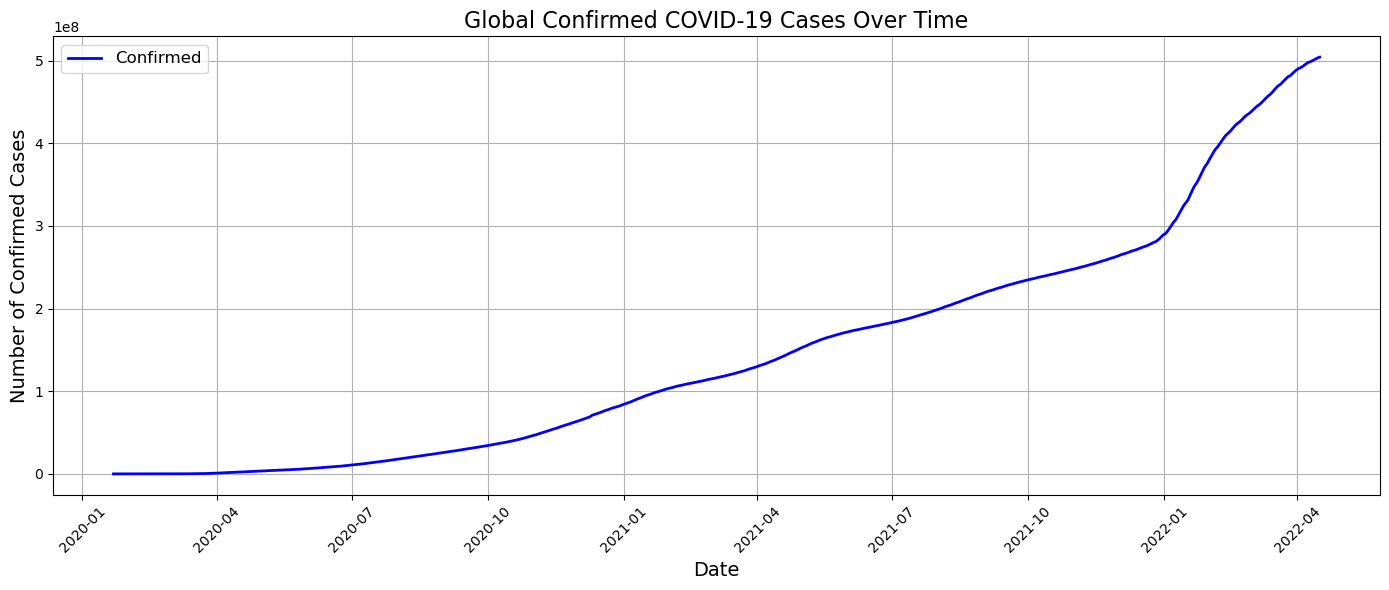

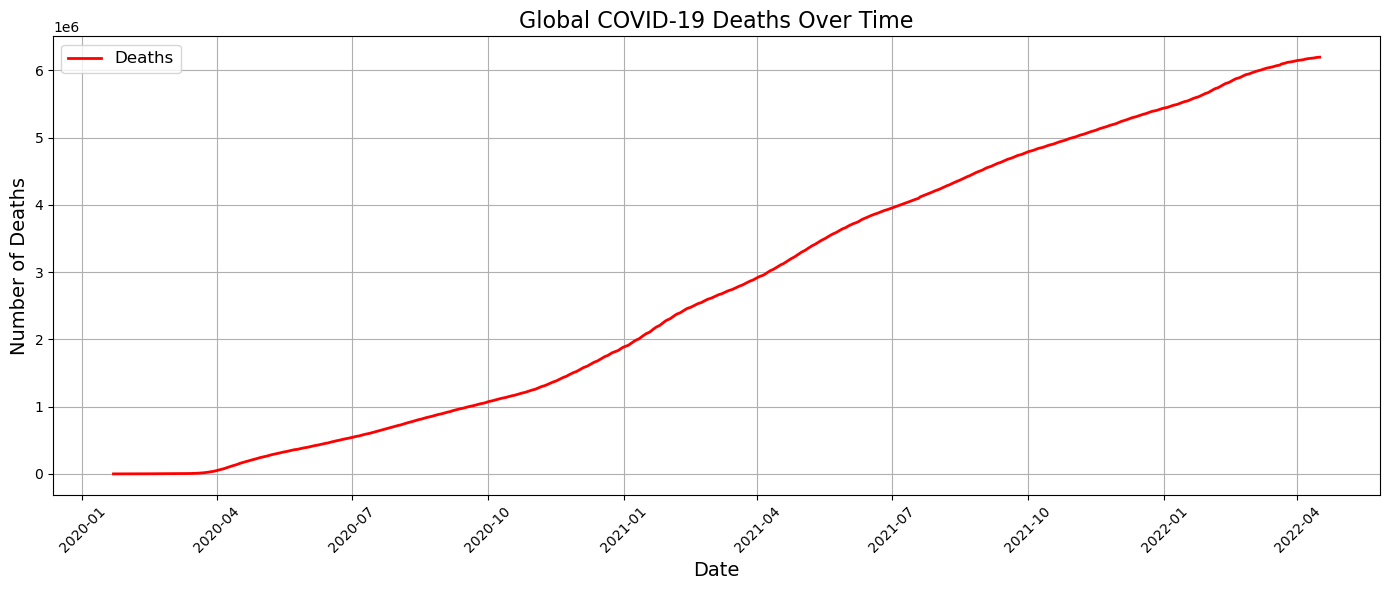

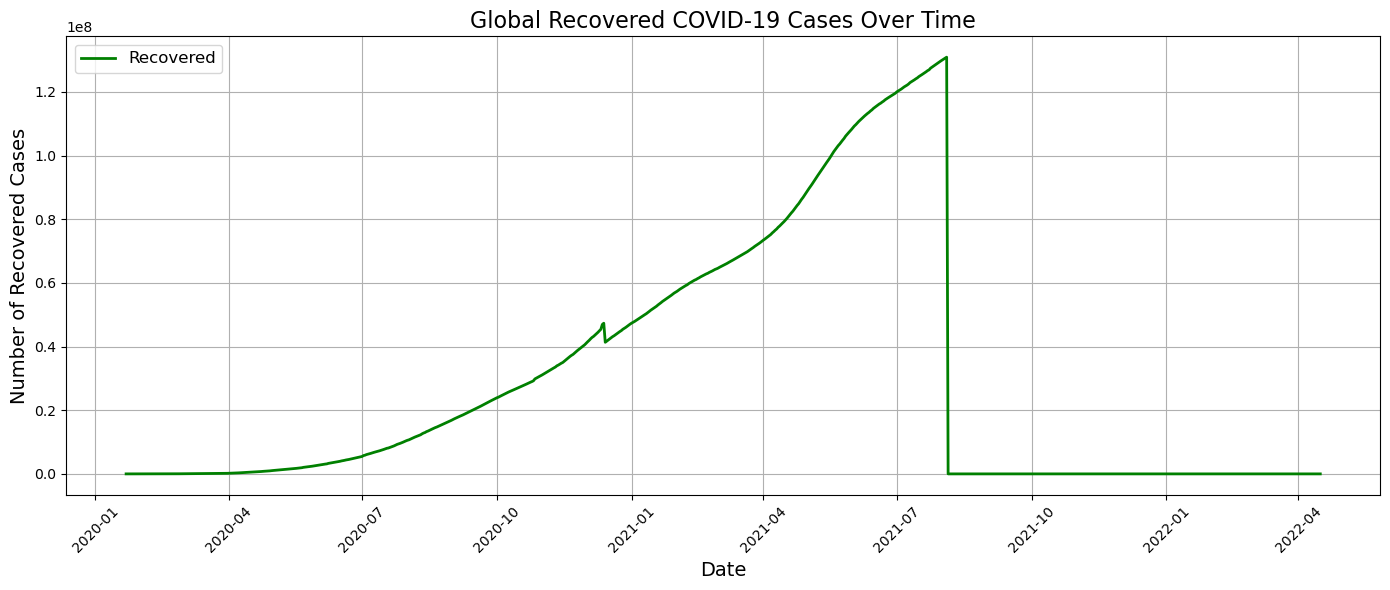

In [4]:
# Task-3
import matplotlib.pyplot as plt

global_data = df.groupby('Date').sum().reset_index()

plt.figure(figsize=(14, 6))
plt.plot(global_data['Date'], global_data['Confirmed'], label='Confirmed', color='blue', linewidth=2)
plt.title('Global Confirmed COVID-19 Cases Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Confirmed Cases', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True) 
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
plt.plot(global_data['Date'], global_data['Deaths'], label='Deaths', color='red', linewidth=2)
plt.title('Global COVID-19 Deaths Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Deaths', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
plt.plot(global_data['Date'], global_data['Recovered'], label='Recovered', color='green', linewidth=2)
plt.title('Global Recovered COVID-19 Cases Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Recovered Cases', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)  
plt.tight_layout()
plt.show()

Enter the name of the country to visualize its COVID-19 trends: US


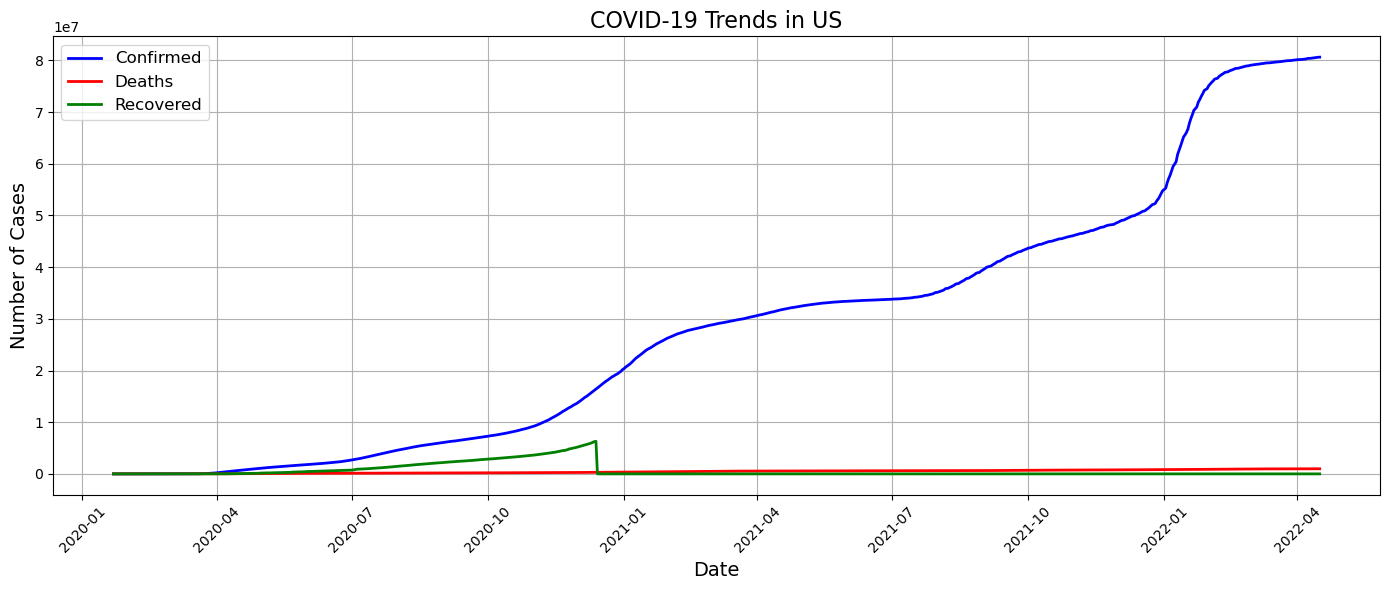

Enter the names of countries to compare, separated by commas: US, Brazil


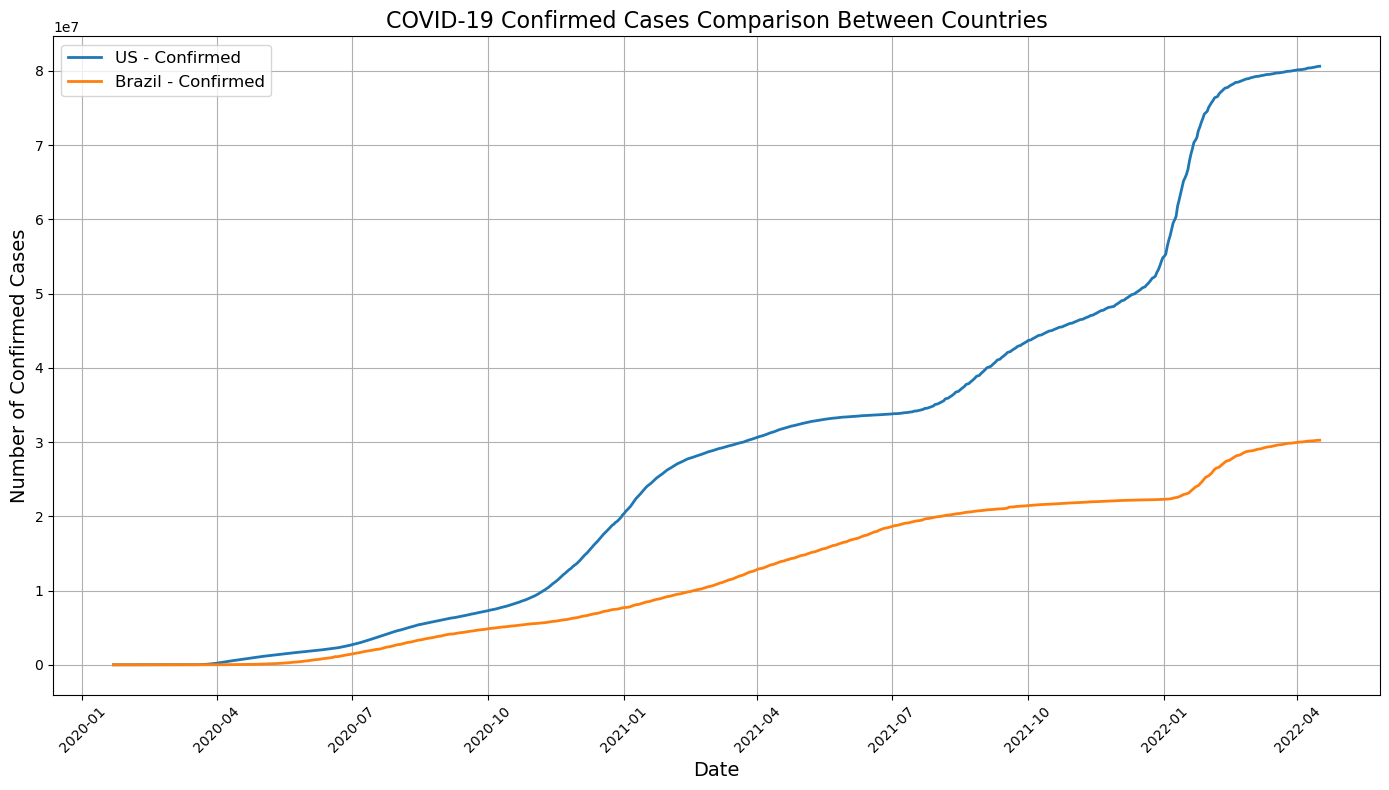

In [5]:
# Task-4
import matplotlib.pyplot as plt

def plot_country_trends(country):
    country_data = df[df['Country'] == country]

    plt.figure(figsize=(14, 6))
    plt.plot(country_data['Date'], country_data['Confirmed'], label='Confirmed', color='blue', linewidth=2)
    plt.plot(country_data['Date'], country_data['Deaths'], label='Deaths', color='red', linewidth=2)
    plt.plot(country_data['Date'], country_data['Recovered'], label='Recovered', color='green', linewidth=2)
    
    plt.title(f'COVID-19 Trends in {country}', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Number of Cases', fontsize=14)
    plt.legend(loc='upper left', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
country = input("Enter the name of the country to visualize its COVID-19 trends: ")
plot_country_trends(country)

def compare_countries(countries):
    plt.figure(figsize=(14, 8))
    
    for country in countries:
        country_data = df[df['Country'] == country]
        plt.plot(country_data['Date'], country_data['Confirmed'], label=f'{country} - Confirmed', linewidth=2)
    
    plt.title('COVID-19 Confirmed Cases Comparison Between Countries', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Number of Confirmed Cases', fontsize=14)
    plt.legend(loc='upper left', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
countries = input("Enter the names of countries to compare, separated by commas: ").split(',')
countries = [country.strip() for country in countries]
compare_countries(countries)

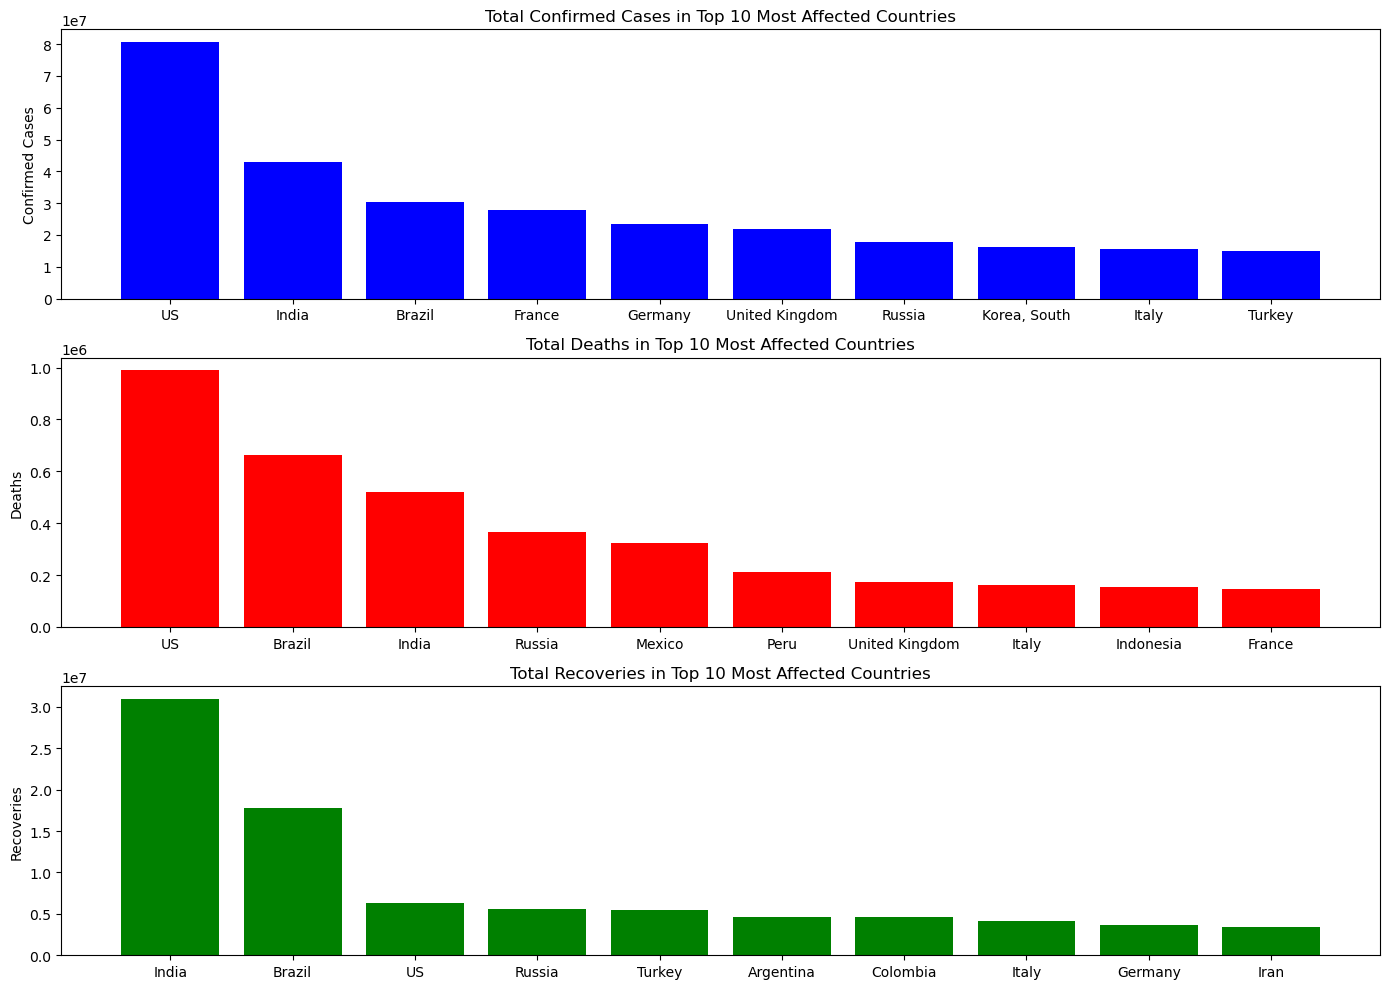

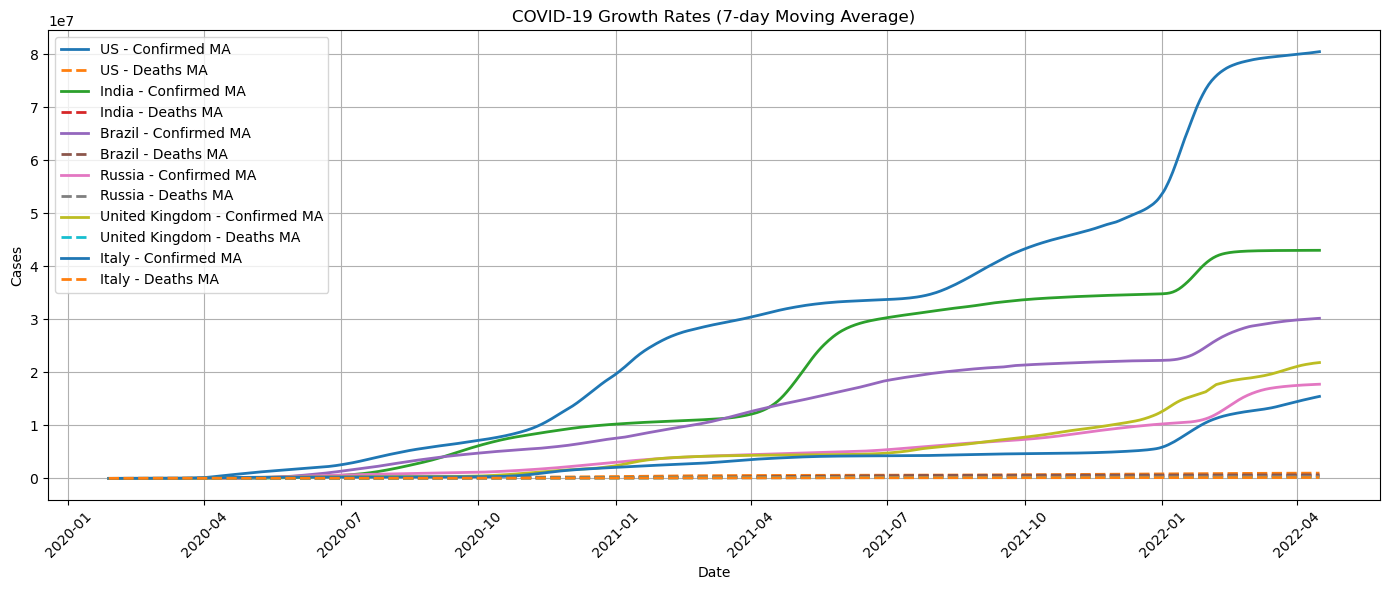

In [6]:
# Task-5
import matplotlib.pyplot as plt

country_totals = df.groupby('Country').agg({
    'Confirmed': 'max',
    'Deaths': 'max',
    'Recovered': 'max'
}).reset_index()

top_10_countries_c = country_totals.nlargest(10, 'Confirmed')
top_10_countries_d = country_totals.nlargest(10, 'Deaths')
top_10_countries_r = country_totals.nlargest(10, 'Recovered')

plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
plt.bar(top_10_countries_c['Country'], top_10_countries_c['Confirmed'], color='blue')
plt.title('Total Confirmed Cases in Top 10 Most Affected Countries')
plt.ylabel('Confirmed Cases')

plt.subplot(3, 1, 2)
plt.bar(top_10_countries_d['Country'], top_10_countries_d['Deaths'], color='red')
plt.title('Total Deaths in Top 10 Most Affected Countries')
plt.ylabel('Deaths')

plt.subplot(3, 1, 3)
plt.bar(top_10_countries_r['Country'], top_10_countries_r['Recovered'], color='green')
plt.title('Total Recoveries in Top 10 Most Affected Countries')
plt.ylabel('Recoveries')

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))

country_data = df.groupby(['Country', 'Date']).sum().reset_index()
country_data['Confirmed_MA'] = country_data.groupby('Country')['Confirmed'].rolling(window=7).mean().reset_index(drop=True)
country_data['Deaths_MA'] = country_data.groupby('Country')['Deaths'].rolling(window=7).mean().reset_index(drop=True)

countries_to_plot = ['US', 'India', 'Brazil', 'Russia', 'United Kingdom', 'Italy']

for country in countries_to_plot:
    country_subset = country_data[country_data['Country'] == country]
    plt.plot(country_subset['Date'], country_subset['Confirmed_MA'], label=f'{country} - Confirmed MA', linewidth=2)
    plt.plot(country_subset['Date'], country_subset['Deaths_MA'], label=f'{country} - Deaths MA', linestyle='dashed', linewidth=2)

plt.title('COVID-19 Growth Rates (7-day Moving Average)')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

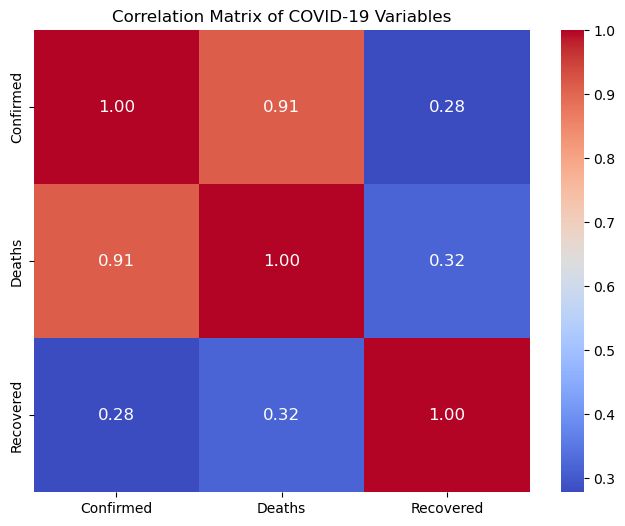

In [7]:
#Task-6
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df[['Confirmed', 'Deaths', 'Recovered']].corr()

# Plotting the heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 12})
plt.title('Correlation Matrix of COVID-19 Variables')
plt.show()

# PART-2

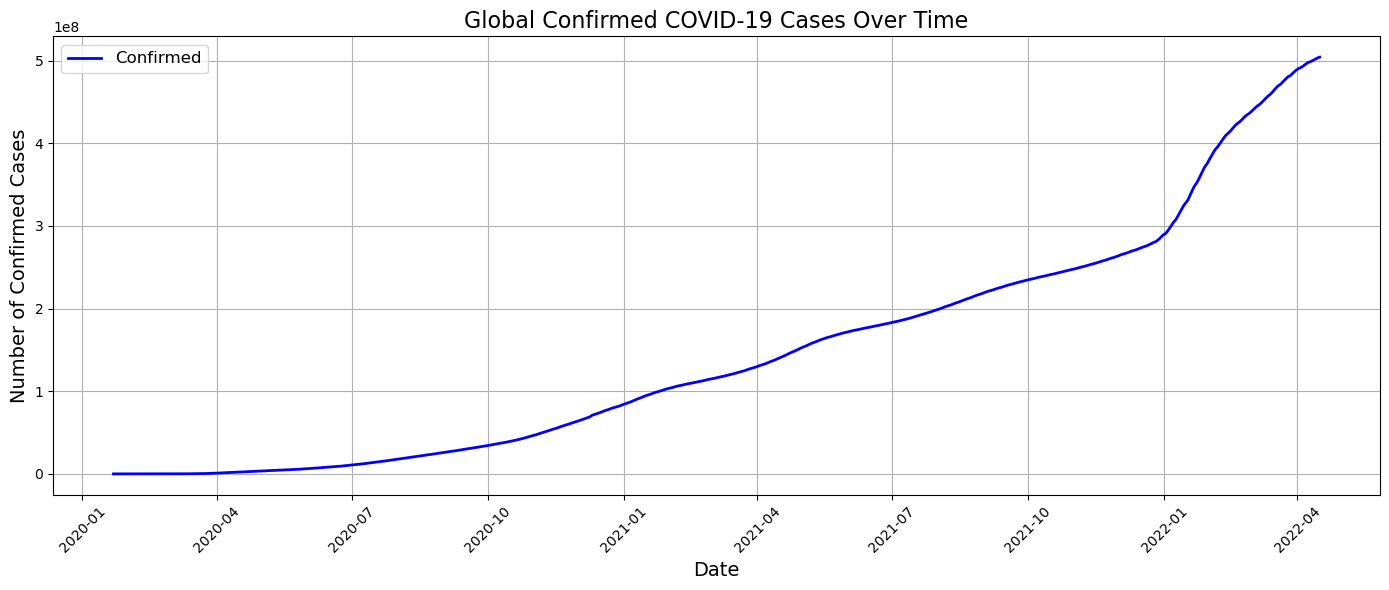

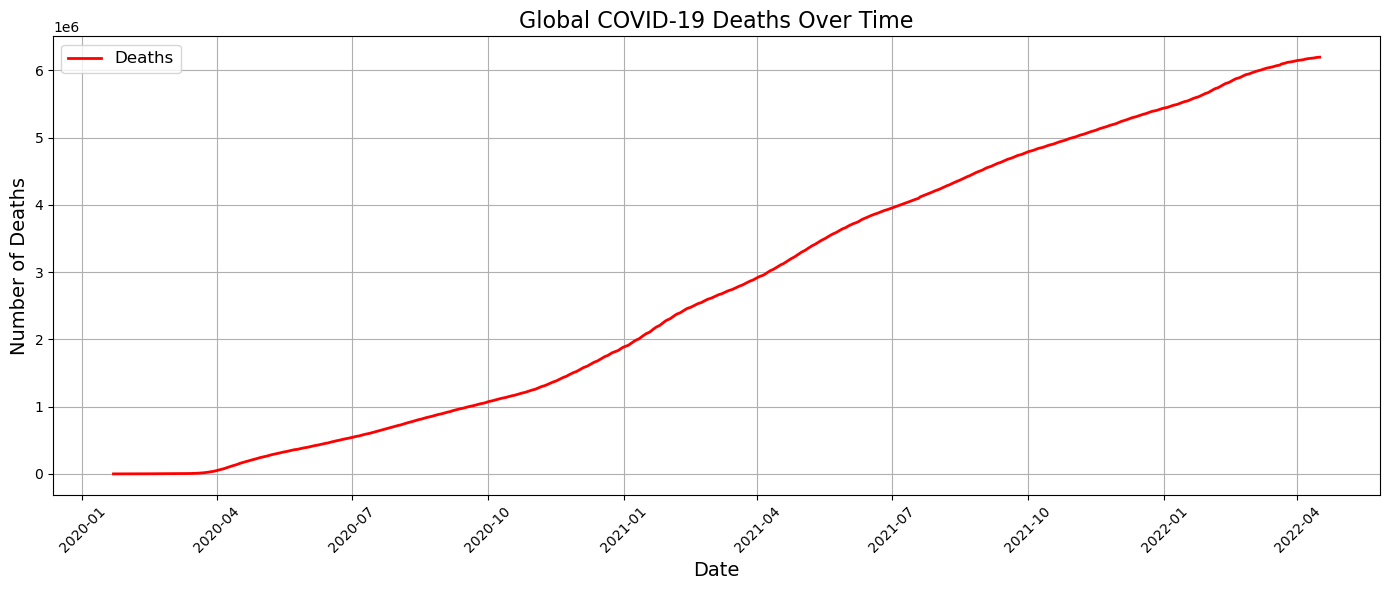

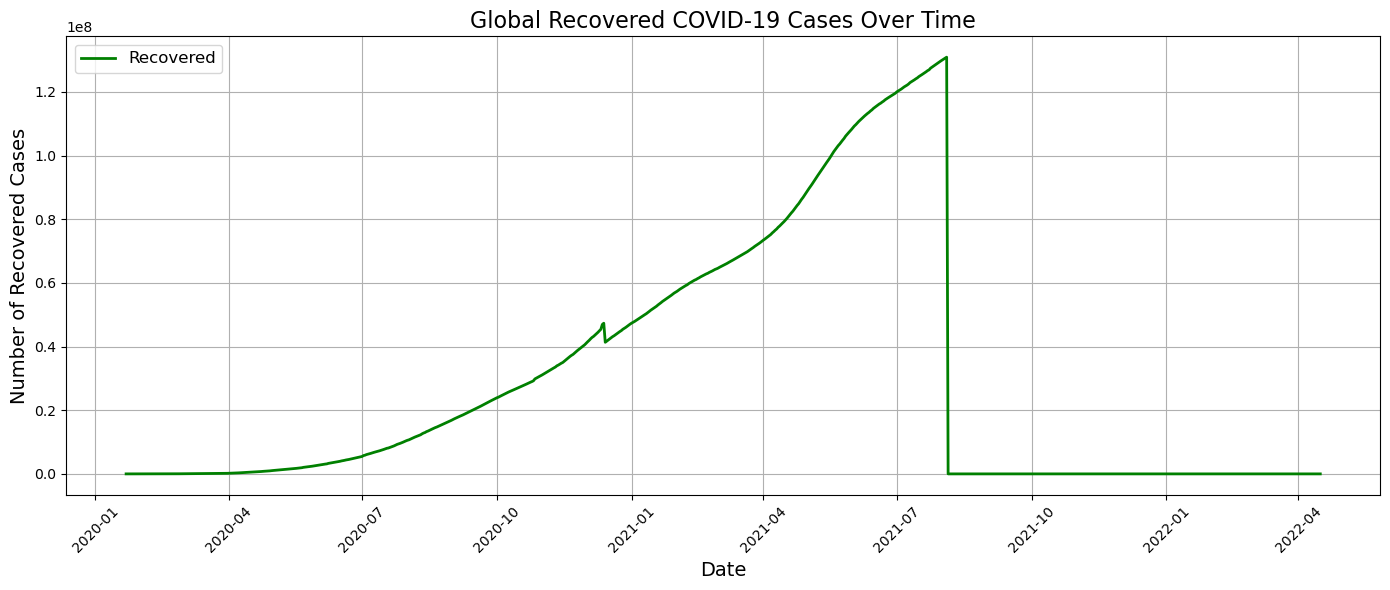

In [8]:
#1) 
import matplotlib.pyplot as plt

global_data = df.groupby('Date').sum().reset_index()

plt.figure(figsize=(14, 6))
plt.plot(global_data['Date'], global_data['Confirmed'], label='Confirmed', color='blue', linewidth=2)
plt.title('Global Confirmed COVID-19 Cases Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Confirmed Cases', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True) 
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
plt.plot(global_data['Date'], global_data['Deaths'], label='Deaths', color='red', linewidth=2)
plt.title('Global COVID-19 Deaths Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Deaths', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
plt.plot(global_data['Date'], global_data['Recovered'], label='Recovered', color='green', linewidth=2)
plt.title('Global Recovered COVID-19 Cases Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Recovered Cases', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)  
plt.tight_layout()
plt.show()

In [9]:
#2)
latest_date = df['Date'].max()
latest_data = df[df['Date'] == latest_date]

highest_confirmed = latest_data.loc[latest_data['Confirmed'].idxmax()]
highest_deaths = latest_data.loc[latest_data['Deaths'].idxmax()]
highest_recovered = latest_data.loc[latest_data['Recovered'].idxmax()]

print("Country with highest confirmed cases:", highest_confirmed['Country'], highest_confirmed['Confirmed'])
print("Country with highest deaths:", highest_deaths['Country'], highest_deaths['Deaths'])
print("Country with highest recoveries:", highest_recovered['Country'], highest_recovered['Recovered'])


Country with highest confirmed cases: US 80625120
Country with highest deaths: US 988609
Country with highest recoveries: Afghanistan 0


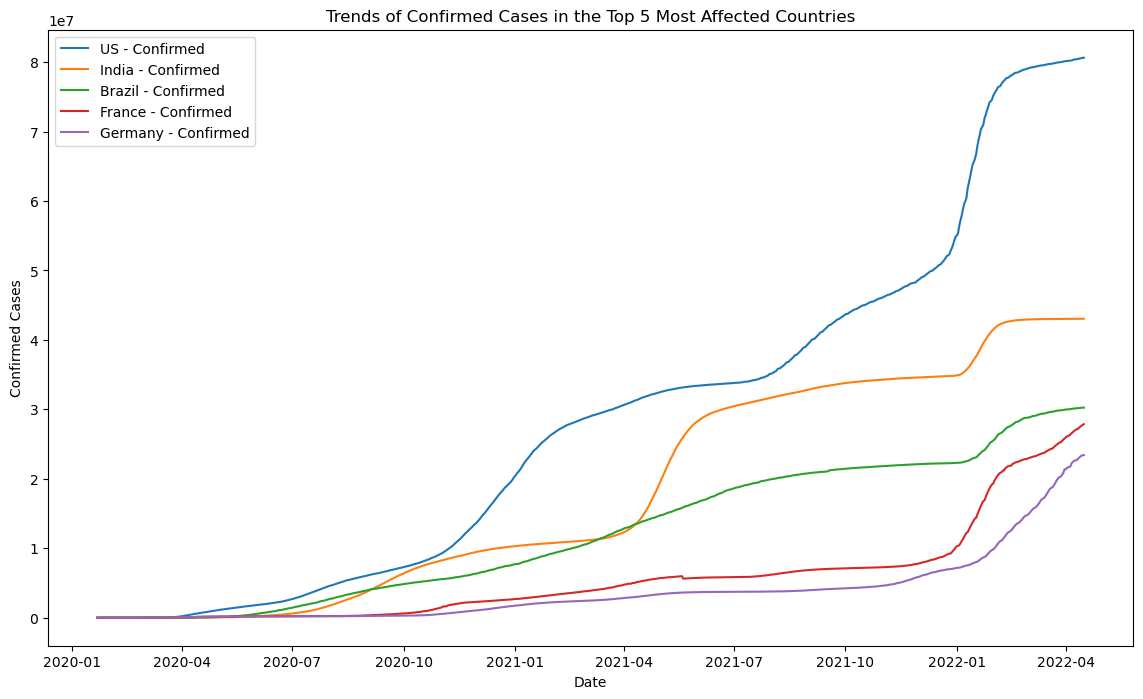

In [10]:
#3)
top_5_countries = latest_data.nlargest(5, 'Confirmed')['Country'].tolist()

def plot_top_5_trends(countries):
    plt.figure(figsize=(14, 8))
    for country in countries:
        country_data = df[df['Country'] == country]
        sns.lineplot(data=country_data, x='Date', y='Confirmed', label=f'{country} - Confirmed')
    
    plt.title('Trends of Confirmed Cases in the Top 5 Most Affected Countries')
    plt.xlabel('Date')
    plt.ylabel('Confirmed Cases')
    plt.legend()
    plt.show()

plot_top_5_trends(top_5_countries)

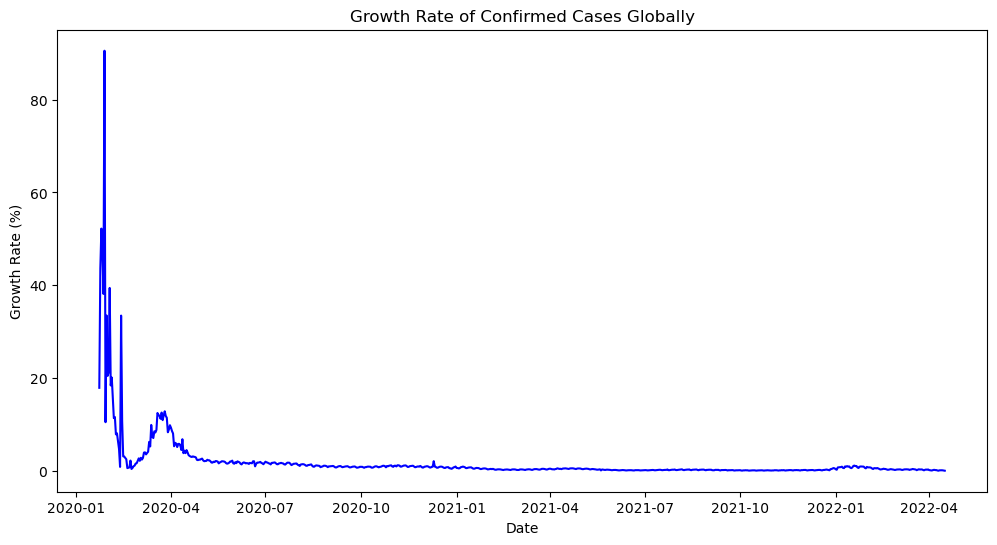

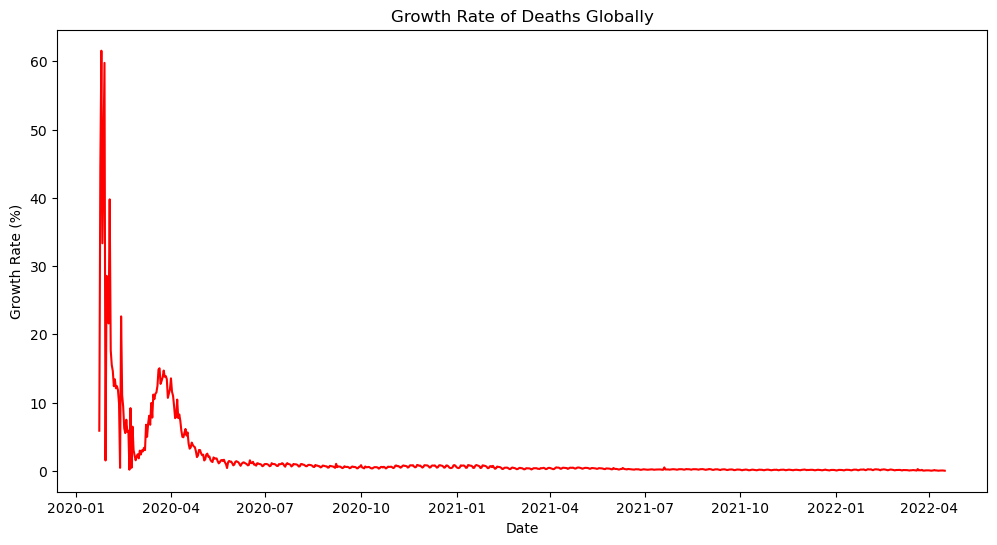

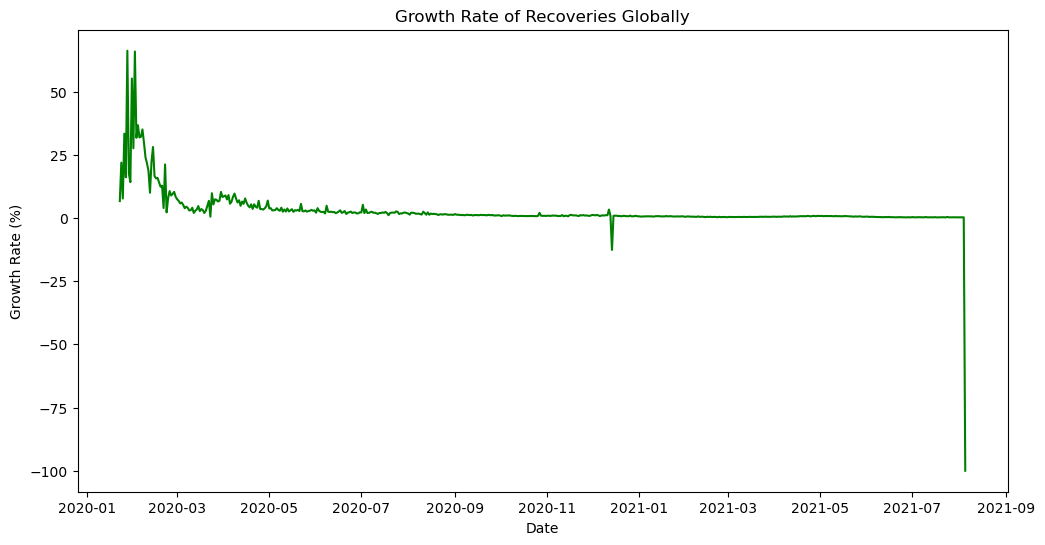

In [11]:
#4)
global_totals = df.groupby('Date').sum().reset_index()

global_totals['Confirmed_Growth_Rate'] = global_totals['Confirmed'].pct_change() * 100
global_totals['Deaths_Growth_Rate'] = global_totals['Deaths'].pct_change() * 100
global_totals['Recovered_Growth_Rate'] = global_totals['Recovered'].pct_change() * 100

plt.figure(figsize=(12, 6))
sns.lineplot(data=global_totals, x='Date', y='Confirmed_Growth_Rate', color='blue')
plt.title('Growth Rate of Confirmed Cases Globally')
plt.xlabel('Date')
plt.ylabel('Growth Rate (%)')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=global_totals, x='Date', y='Deaths_Growth_Rate', color='red')
plt.title('Growth Rate of Deaths Globally')
plt.xlabel('Date')
plt.ylabel('Growth Rate (%)')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=global_totals, x='Date', y='Recovered_Growth_Rate', color='green')
plt.title('Growth Rate of Recoveries Globally')
plt.xlabel('Date')
plt.ylabel('Growth Rate (%)')
plt.show()

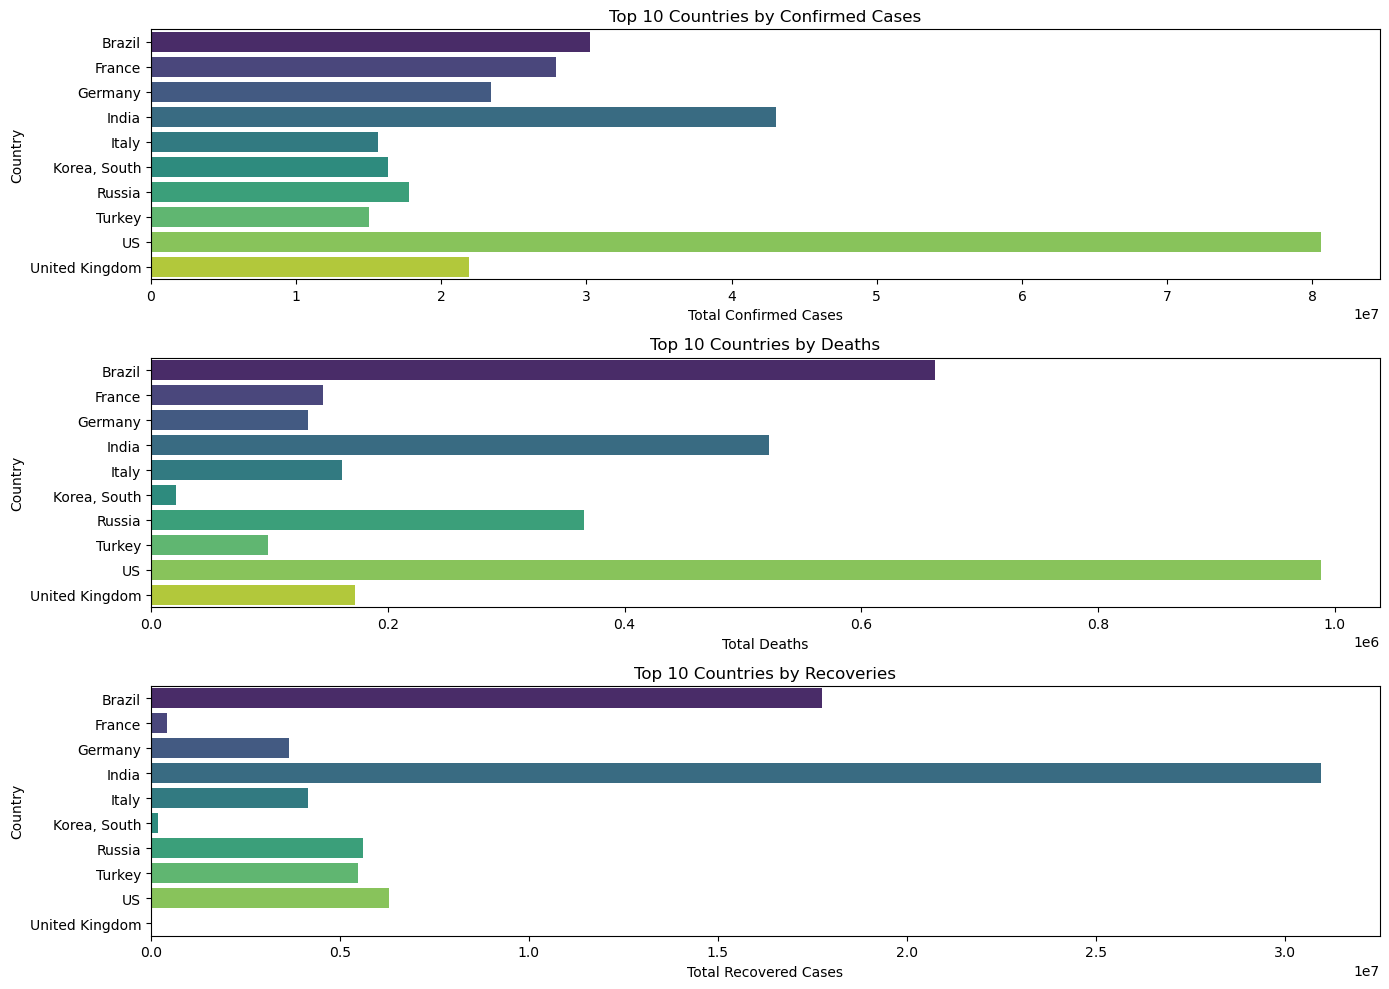

In [12]:
#5) 
top_10_countries = latest_data.nlargest(10, 'Confirmed')['Country'].tolist()
top_10_totals = df[df['Country'].isin(top_10_countries)].groupby('Country').max().reset_index()

plt.figure(figsize=(14, 10))

# Confirmed cases
plt.subplot(3, 1, 1)
sns.barplot(data=top_10_totals, x='Confirmed', y='Country', palette='viridis')
plt.title('Top 10 Countries by Confirmed Cases')
plt.xlabel('Total Confirmed Cases')
plt.ylabel('Country')

# Deaths
plt.subplot(3, 1, 2)
sns.barplot(data=top_10_totals, x='Deaths', y='Country', palette='viridis')
plt.title('Top 10 Countries by Deaths')
plt.xlabel('Total Deaths')
plt.ylabel('Country')

# Recoveries
plt.subplot(3, 1, 3)
sns.barplot(data=top_10_totals, x='Recovered', y='Country', palette='viridis')
plt.title('Top 10 Countries by Recoveries')
plt.xlabel('Total Recovered Cases')
plt.ylabel('Country')

plt.tight_layout()
plt.show()

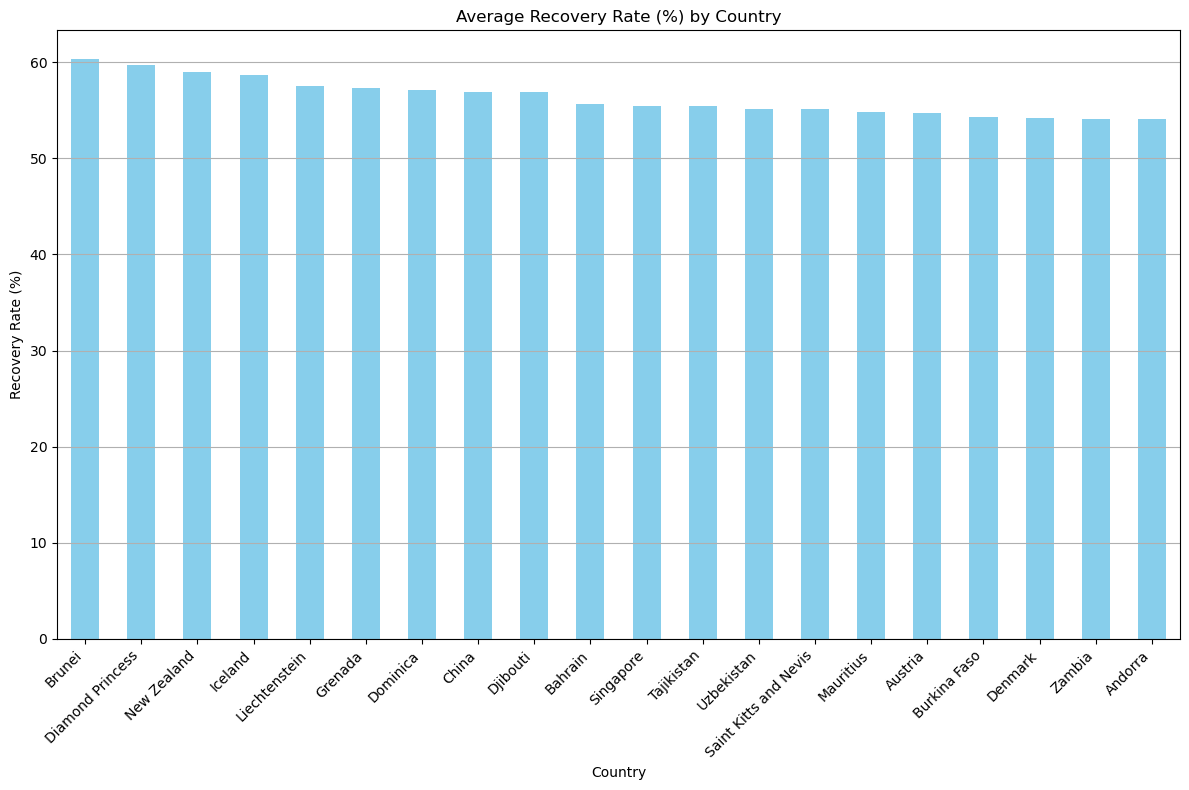

In [13]:
#6) 
df['RecoveryRate'] = (df['Recovered'] / df['Confirmed']) * 100

country_recovery_rates = df.groupby('Country')['RecoveryRate'].mean()

country_recovery_rates = country_recovery_rates.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
country_recovery_rates.head(20).plot(kind='bar', color='skyblue')
plt.title('Average Recovery Rate (%) by Country')
plt.xlabel('Country')
plt.ylabel('Recovery Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

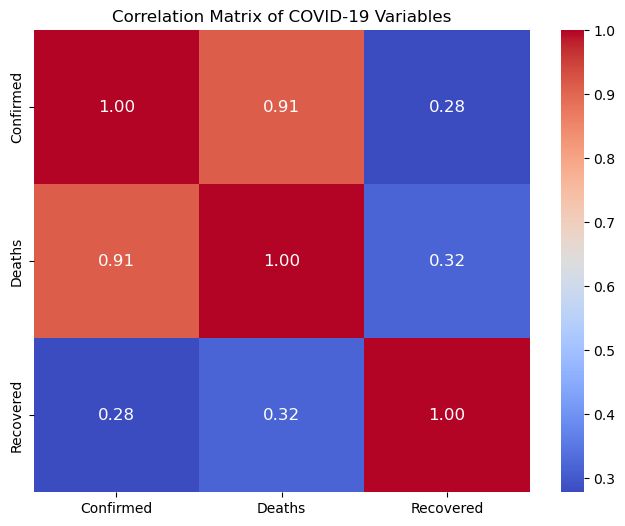

In [14]:
#7)
correlation_matrix = df[['Confirmed', 'Deaths', 'Recovered']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 12})
plt.title('Correlation Matrix of COVID-19 Variables')
plt.show()

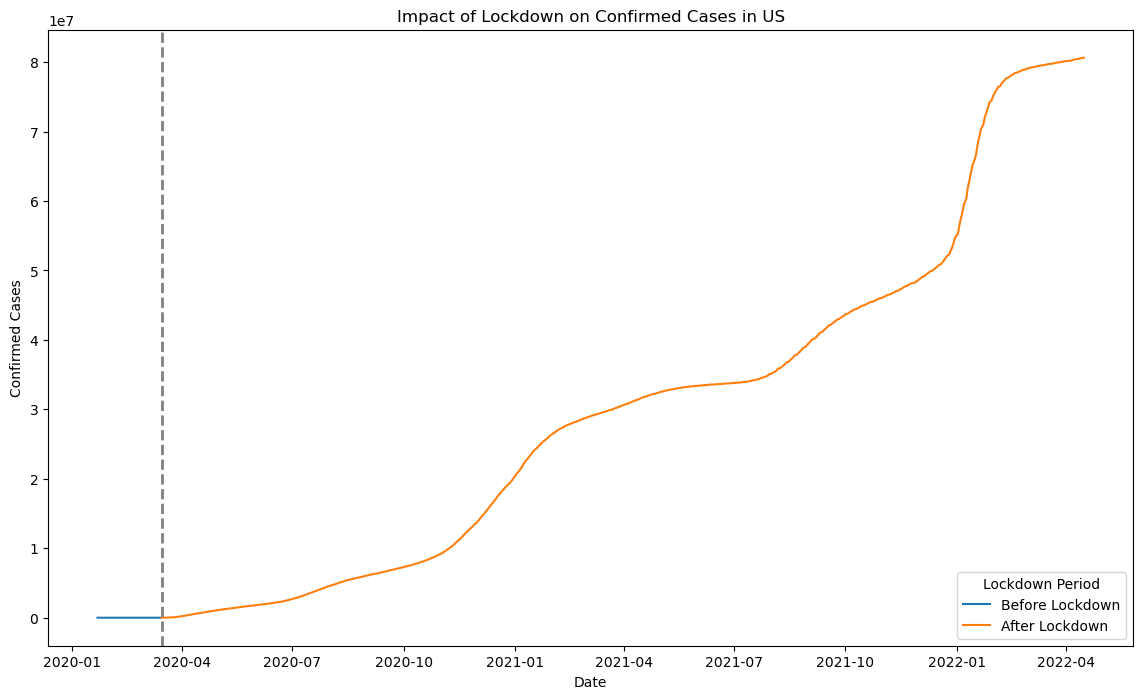

In [15]:
#8)
import numpy as np

def plot_lockdown_impact(country, lockdown_date):
    country_data = df[df['Country'] == country]
    country_data['Lockdown'] = np.where(country_data['Date'] < lockdown_date, 'Before Lockdown', 'After Lockdown')

    plt.figure(figsize=(14, 8))
    sns.lineplot(data=country_data, x='Date', y='Confirmed', hue='Lockdown')
    plt.title(f'Impact of Lockdown on Confirmed Cases in {country}')
    plt.xlabel('Date')
    plt.ylabel('Confirmed Cases')
    plt.axvline(pd.to_datetime(lockdown_date), color='gray', linestyle='--', linewidth=2)
    plt.legend(title='Lockdown Period')
    plt.show()

plot_lockdown_impact('US', '2020-03-15')

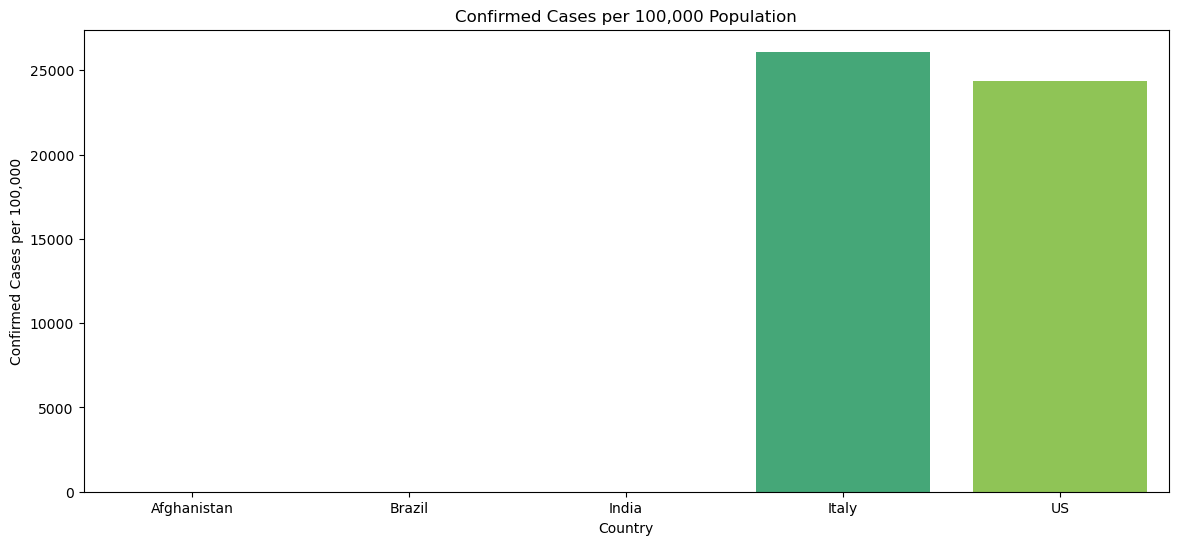

In [16]:
#9)
population_data = {
    'Italy': 60_000_000,
    'Spain': 47_000_000,
    'Germany': 83_000_000,
    'France': 67_000_000,
    'US': 331_000_000
}

def plot_testing_proxy(countries):
    latest_data = df[df['Date'] == df['Date'].max()]
    latest_data = latest_data[latest_data['Country'].isin(countries)]

    latest_data['Population'] = latest_data['Country'].map(population_data)
    latest_data['Confirmed_per_100k'] = (latest_data['Confirmed'] / latest_data['Population']) * 100000

    plt.figure(figsize=(14, 6))
    sns.barplot(data=latest_data, x='Country', y='Confirmed_per_100k', palette='viridis')
    plt.title('Confirmed Cases per 100,000 Population')
    plt.xlabel('Country')
    plt.ylabel('Confirmed Cases per 100,000')
    plt.show()

plot_testing_proxy(['Italy', 'Afghanistan', 'India', 'Brazil', 'US'])

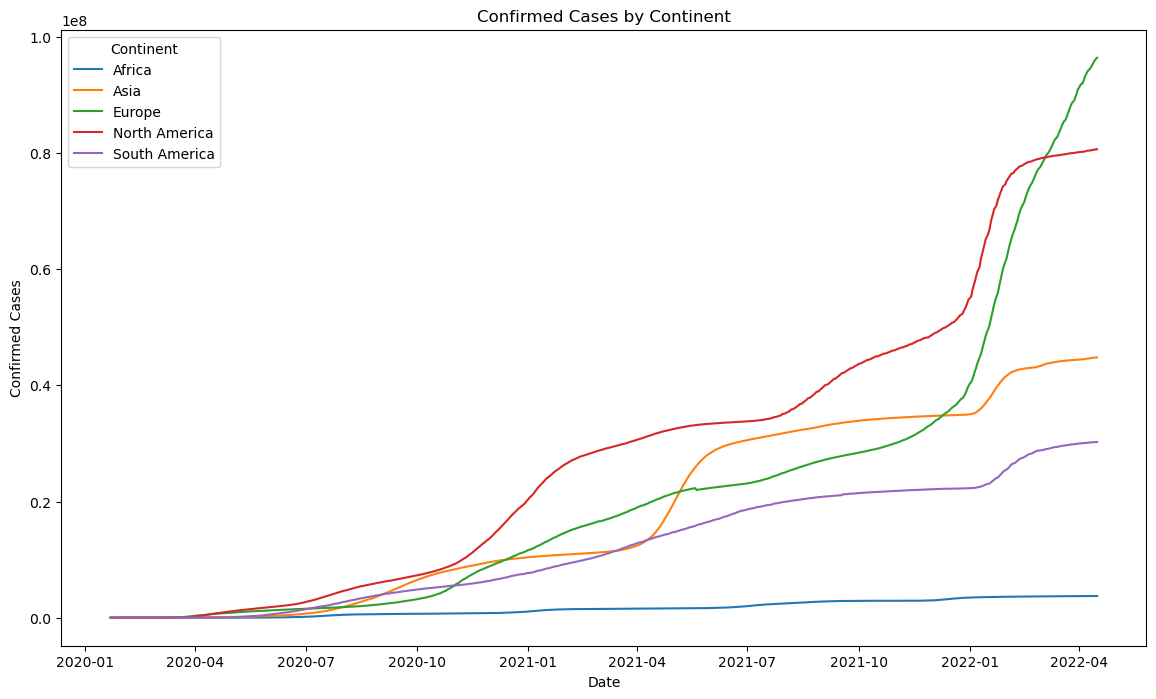

In [17]:
#10)
continent_data = {
    'Italy': 'Europe',
    'Spain': 'Europe',
    'Germany': 'Europe',
    'France': 'Europe',
    'US': 'North America',
    'Brazil': 'South America',
    'India': 'Asia',
    'Russia': 'Europe',
    'China': 'Asia',
    'South Africa': 'Africa'
}
df['Continent'] = df['Country'].map(continent_data)

continent_totals = df.groupby(['Continent', 'Date']).sum().reset_index()

# Confirmed Cases by Continent
plt.figure(figsize=(14, 8))
sns.lineplot(data=continent_totals, x='Date', y='Confirmed', hue='Continent')
plt.title('Confirmed Cases by Continent')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend(title='Continent')
plt.show()

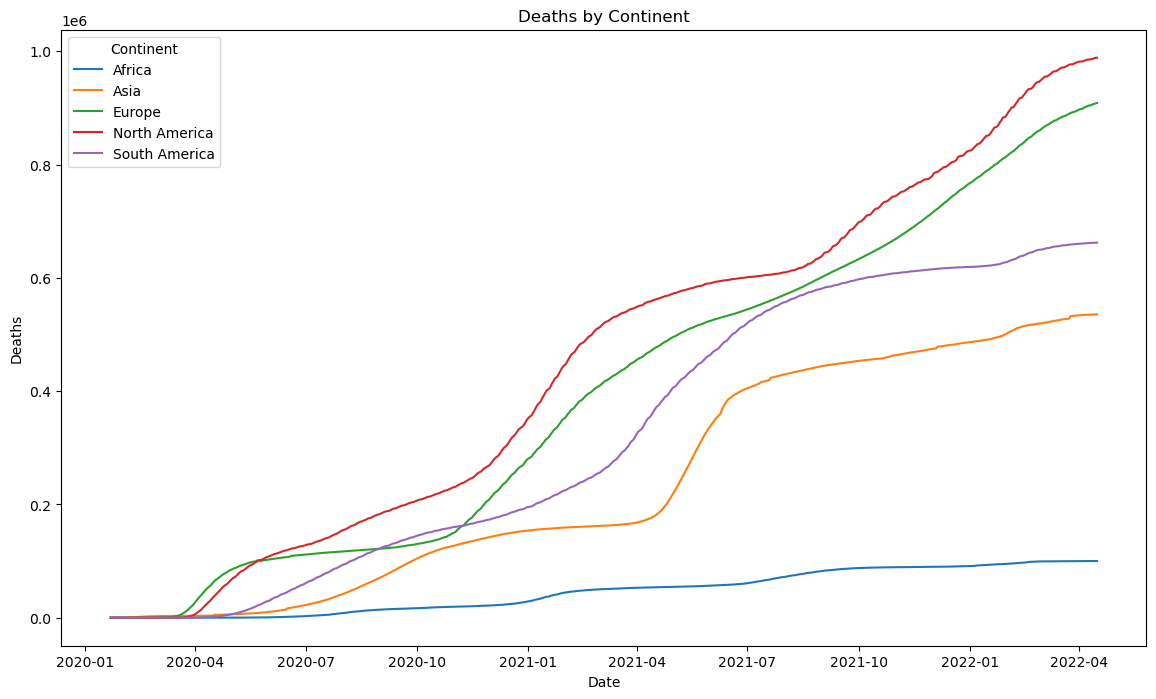

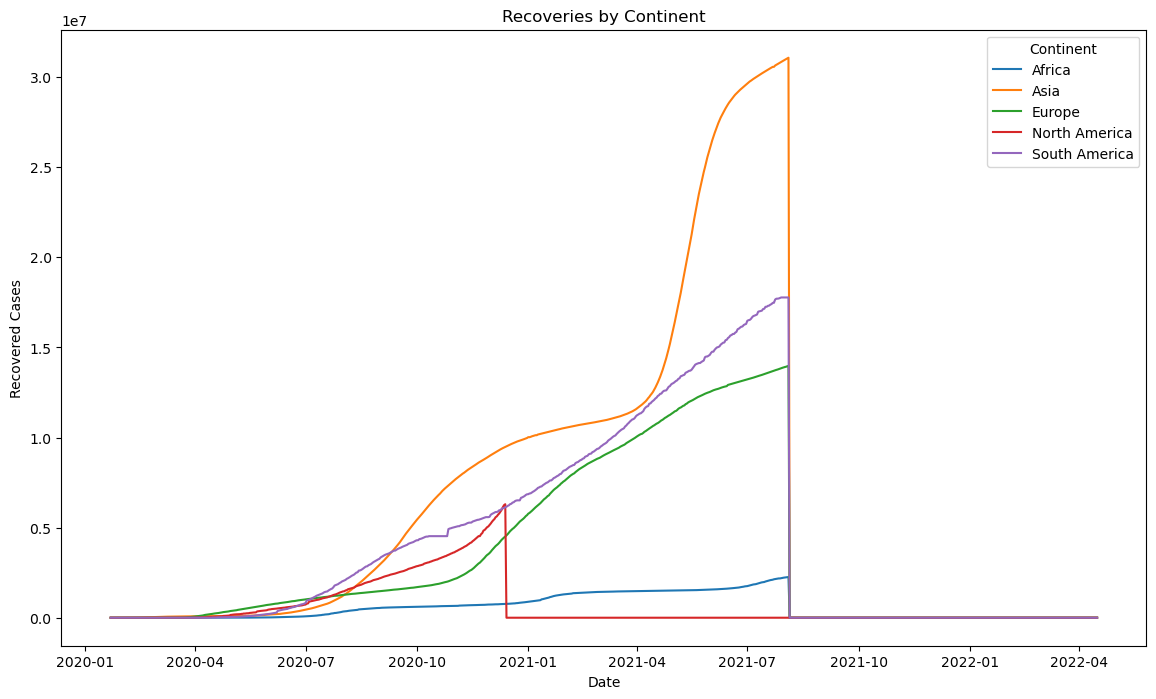

In [18]:
# Deaths by Continent
plt.figure(figsize=(14, 8))
sns.lineplot(data=continent_totals, x='Date', y='Deaths', hue='Continent')
plt.title('Deaths by Continent')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.legend(title='Continent')
plt.show()

# Recoveries by Continent
plt.figure(figsize=(14, 8))
sns.lineplot(data=continent_totals, x='Date', y='Recovered', hue='Continent')
plt.title('Recoveries by Continent')
plt.xlabel('Date')
plt.ylabel('Recovered Cases')
plt.legend(title='Continent')
plt.show()